# Importing Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading the Data
This DataSet constitute the Sales record of various manufacturing industries in the recent Financial Years.  

In [2]:
data_ev = pd.read_excel("EV_Data_Summary.xlsx",sheet_name=None)

In [3]:
data_ev.keys()

dict_keys(['EV 2W FY 19-20', 'EV 2W FY 20-21', 'EV 2W FY 21-22', 'EV 2W FY 22-23', 'EV 2W FY 23-24', 'Electric Bus Sales', 'Electric 4-Wheeler Sales', 'Electric 3-Wheeler Sales', 'Electric 2-Wheeler Sales', 'EV Industries'])

In [4]:
data_ev["EV Industries"]

,Category,Financial_Year,Num_Vehicles
0,E-2 Wheelers,2017-18,1981
1,E-2 Wheelers,2018-19,27478
2,E-2 Wheelers,2019-20,26512
3,E-2 Wheelers,2020-21,44294
4,E-2 Wheelers,2021-22,249615
5,E-2 Wheelers,2022-23,728090
6,E-2 Wheelers,2023-24,945889
7,E-3 Wheelers,2017-18,91970
8,E-3 Wheelers,2018-19,116031
9,E-3 Wheelers,2019-20,143051


# Plotting the Basic Sales Data 

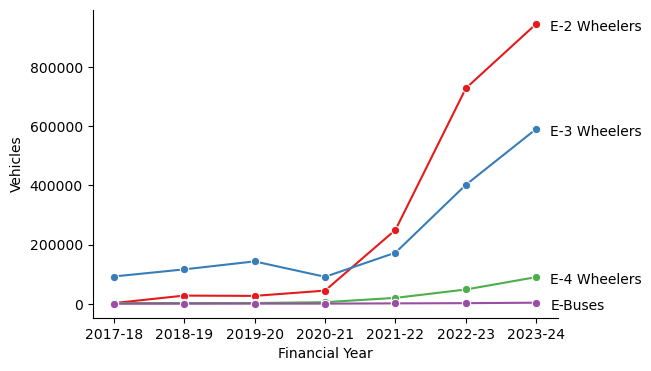

In [5]:
import warnings 
warnings.filterwarnings("ignore", message="use_inf_as_na")


fig, ax = plt.subplots(figsize=(6, 4))
ax= sns.lineplot(data=data_ev['EV Industries'], x='Financial_Year', y='Num_Vehicles', hue='Category', marker='o', palette='Set1')

plt.xlabel("Financial Year")
plt.ylabel("Vehicles")
plt.legend(title="Category")

# Labeling the Final Point for each group
for col in data_ev['EV Industries']['Category'].unique():
    last_point = data_ev['EV Industries'][data_ev['EV Industries']['Category'] == col].iloc[-1]
    plt.annotate(f"{last_point['Category']}", (last_point['Financial_Year'], last_point['Num_Vehicles']),
                 textcoords="offset points",xytext=(10, -5), ha='left')
    
ax.spines[['right', 'top']].set_visible(False)
ax.get_legend().set_visible(False)
plt.savefig('ev_sale.png', format = 'png')
plt.show()

**Above Figure showing the Growth in demand of 2-Wheeler and 3-Wheeler market in the recent years.**

In [6]:
ev2w = list(data_ev.keys())[0:5]
data_ev2w = pd.concat([data_ev[ev2w[0]], data_ev[ev2w[1]], data_ev[ev2w[2]], data_ev[ev2w[3]],data_ev[ev2w[4]]])
data_ev2w["Producer"] = data_ev2w["Producer"].str.upper()
np.sort(data_ev2w["Producer"].unique())

array(['AMPERE', 'ATHER', 'BAJAJ', 'BATTRE ELECTRIC', 'BENLING', 'BGAUSS',
       'HERO ELECTRIC', 'JITENDRA', 'KINETIC GREEN', 'OKAYA EV',
       'OKINAWA', 'OLA ELECTRIC', 'OTHERS', 'PURE EV', 'REVOLT', 'TVS'],
      dtype=object)

In [7]:
data_ev2w

,Financial_Year,Producer,Market_Share,Month,Num_Vehicles
0,2019-20,HERO ELECTRIC,0.30,Apr,1776
1,2019-20,HERO ELECTRIC,0.30,May,455
2,2019-20,HERO ELECTRIC,0.30,Jun,329
3,2019-20,HERO ELECTRIC,0.30,Jul,260
4,2019-20,HERO ELECTRIC,0.30,Aug,249
...,...,...,...,...,...
151,2023-24,OTHERS,0.08,Nov,9826
152,2023-24,OTHERS,0.08,Dec,7785
153,2023-24,OTHERS,0.08,Jan,6746
154,2023-24,OTHERS,0.08,Feb,6229


In [8]:
# Grouping and aggregating data
data_ev2w_year = data_ev2w.groupby(['Financial_Year', 'Producer']).agg({'Num_Vehicles':'sum'}).reset_index()

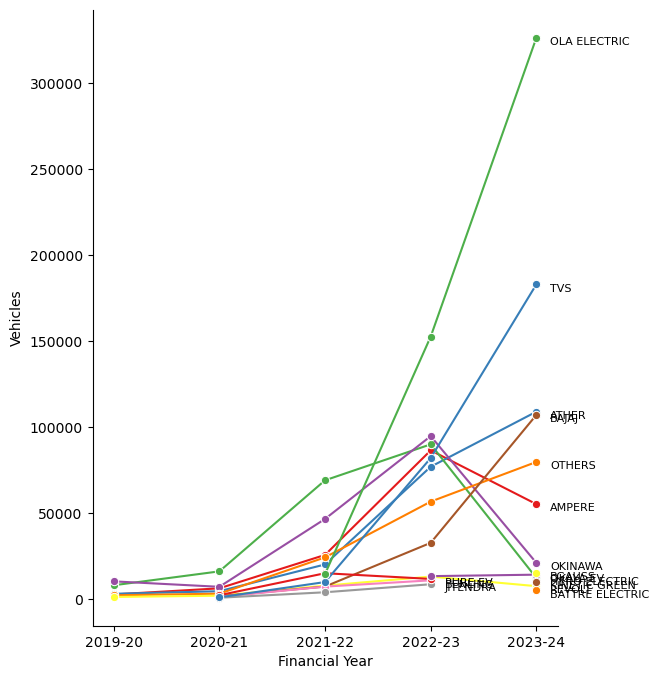

In [9]:
# Creating the plot
fig, ax = plt.subplots(figsize=(6,8))
ax = sns.lineplot(data=data_ev2w_year, x='Financial_Year', y='Num_Vehicles', hue='Producer', marker='o', palette='Set1')

# Setting labels and legend
plt.xlabel("Financial Year", fontsize = 10)
plt.ylabel("Vehicles", fontsize = 10)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.legend(title='Producer')

# Labeling the last data point
for col in data_ev2w_year['Producer'].unique()[::1]:
    last_point = data_ev2w_year[data_ev2w_year['Producer'] == col].iloc[-1]
    plt.annotate(f"{last_point['Producer']}", (last_point['Financial_Year'], last_point['Num_Vehicles']),
                 textcoords="offset points",xytext=(10, -5), ha='left',fontsize=8)

ax.spines[['right', 'top']].set_visible(False)
ax.get_legend().set_visible(False)
plt.savefig('ev_2w.png', format = 'png')
plt.show()

**Figure showing the Growth in Company's Sales value in recent years**

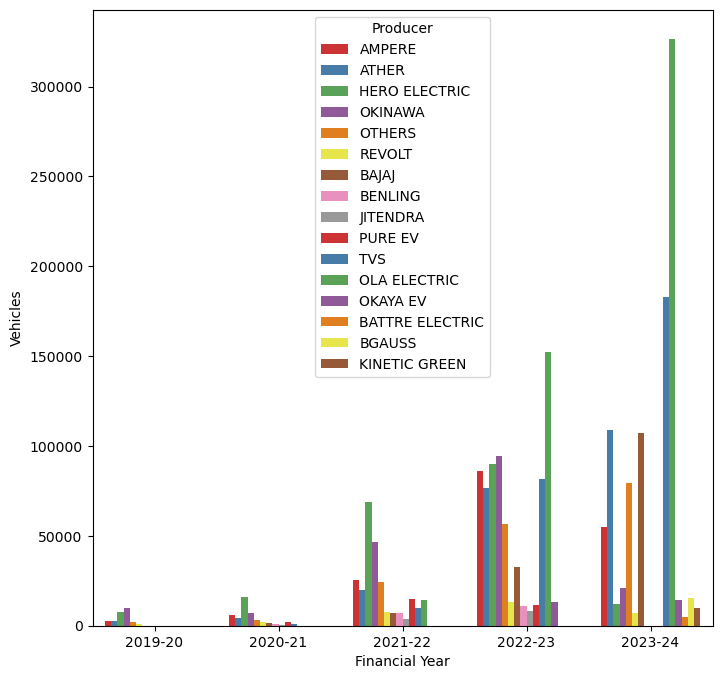

In [10]:
# Using Barplot to find main market players
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.barplot(data=data_ev2w_year, x='Financial_Year', y='Num_Vehicles', hue='Producer', palette='Set1')

plt.xlabel("Financial Year", fontsize = 10)
plt.ylabel("Vehicles", fontsize = 10)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.legend(title='Producer')
plt.savefig('ev_2wbarplot.png', format = 'png')
plt.show()

**This Fig. Shows the main market players currently in the 2-Wheeler segment**

# Exploratory Data Analysis
**->** The Dataset here used the Reviews data from online websites of 2-Wheeler Customers giving an insight in their behaviours. 

**->** There's also a dataset regarding the pricing range of some 2W vehicles which help in understanding the price points as well.

In [11]:
data_model = pd.read_excel("EV_ModelsSpec.xlsx")
data_rv = pd.read_excel("2W-ReviewBased_Data.xlsx")
data = data_rv.merge(data_model,how='left',on="Model Name")

In [12]:
data.head()

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W)
0,Revolt motors is a fraud company. They provide...,Daily Commute,> 1 yr,< 5000 kms,1,1.0,1.0,1.0,1.0,1.0,NaN,1.0,NaN,Revolt RV 400,134975,150,85,108,5,3000
1,This is very good bike to ride comfortable als...,Daily Commute,3-6 months,< 5000 kms,4,4.0,3.0,3.0,4.0,NaN,4.0,NaN,NaN,Revolt RV 400,134975,150,85,108,5,3000
2,Revolt bikes are the best budget friendly bike...,Daily Commute,< 3 months,< 5000 kms,4,5.0,3.0,4.0,3.0,NaN,4.0,NaN,NaN,Revolt RV 400,134975,150,85,108,5,3000
3,It's a good and eco friendly bike. Very less m...,Daily Commute,6 months-1 yr,< 5000 kms,4,5.0,4.0,4.0,4.0,NaN,4.0,NaN,NaN,Revolt RV 400,134975,150,85,108,5,3000
4,"Booked on 5th oct and got on Dhanteras, very n...",Everything,< 3 months,< 5000 kms,4,4.0,4.0,5.0,4.0,4.0,NaN,4.0,NaN,Revolt RV 400,134975,150,85,108,5,3000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   review                       779 non-null    object 
 1   Used it for                  825 non-null    object 
 2   Owned for                    825 non-null    object 
 3   Ridden for                   664 non-null    object 
 4   rating                       825 non-null    int64  
 5   Visual Appeal                731 non-null    float64
 6   Reliability                  711 non-null    float64
 7   Performance                  342 non-null    float64
 8   Service Experience           697 non-null    float64
 9   Extra Features               183 non-null    float64
 10  Comfort                      528 non-null    float64
 11  Maintenance cost             177 non-null    float64
 12  Value for Money              386 non-null    float64
 13  Model Name          

**-> Finding the Percentage of Missing Values for Each Column in the Dataframe** 


In [14]:
((data.isnull().sum() * 100/data.shape[0])).sort_values(ascending = False)

Maintenance cost               78.545455
Extra Features                 77.818182
Performance                    58.545455
Value for Money                53.212121
Comfort                        36.000000
Ridden for                     19.515152
Service Experience             15.515152
Reliability                    13.818182
Visual Appeal                  11.393939
review                          5.575758
Used it for                     0.000000
rating                          0.000000
Owned for                       0.000000
Model Name                      0.000000
Price                           0.000000
Riding Range (km)               0.000000
Top Speed (kmph)                0.000000
Weight (kg)                     0.000000
Battery Charging Time (hrs)     0.000000
Rated Power (W)                 0.000000
dtype: float64

# Analyzing Sentiment Intensity

In [15]:
import nltk
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()
sentiments_list = []

for review_text in data['review']:
    if pd.isna(review_text):
        sentiments_list.append('neutral')
        continue

    # Calculating Sentiment Scores using VADER's Polartity_Scores function    
    sentiment_scores = sia.polarity_scores(review_text)

    positive_score = sentiment_scores['pos']
    negative_score = sentiment_scores['neg']

    if positive_score > negative_score:
        sentiment_label = 'positive'
    elif positive_score < negative_score:
        sentiment_label = 'negative'
    else:
        sentiment_label = 'neutral'

    sentiments_list.append(sentiment_label)

# Adding sentiment to the dataset    
data['sentiment'] = sentiments_list

In [16]:
data['sentiment'].value_counts()

sentiment
positive    514
negative    259
neutral      52
Name: count, dtype: int64

In [17]:
# Creating a new dataframe and copying the value for further analysis
data1 = data[['Used it for', 'Owned for', 'Ridden for', 'rating','Visual Appeal', 'Reliability', 'Performance', 'Service Experience',
       'Extra Features', 'Comfort', 'Maintenance cost', 'Value for Money','sentiment']].copy()
data1.head()

,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,sentiment
0,Daily Commute,> 1 yr,< 5000 kms,1,1.0,1.0,1.0,1.0,1.0,NaN,1.0,NaN,negative
1,Daily Commute,3-6 months,< 5000 kms,4,4.0,3.0,3.0,4.0,NaN,4.0,NaN,NaN,positive
2,Daily Commute,< 3 months,< 5000 kms,4,5.0,3.0,4.0,3.0,NaN,4.0,NaN,NaN,positive
3,Daily Commute,6 months-1 yr,< 5000 kms,4,5.0,4.0,4.0,4.0,NaN,4.0,NaN,NaN,positive
4,Everything,< 3 months,< 5000 kms,4,4.0,4.0,5.0,4.0,4.0,NaN,4.0,NaN,positive


In [18]:
data.head()

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,...,Maintenance cost,Value for Money,Model Name,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W),sentiment
0,Revolt motors is a fraud company. They provide...,Daily Commute,> 1 yr,< 5000 kms,1,1.0,1.0,1.0,1.0,1.0,...,1.0,NaN,Revolt RV 400,134975,150,85,108,5,3000,negative
1,This is very good bike to ride comfortable als...,Daily Commute,3-6 months,< 5000 kms,4,4.0,3.0,3.0,4.0,NaN,...,NaN,NaN,Revolt RV 400,134975,150,85,108,5,3000,positive
2,Revolt bikes are the best budget friendly bike...,Daily Commute,< 3 months,< 5000 kms,4,5.0,3.0,4.0,3.0,NaN,...,NaN,NaN,Revolt RV 400,134975,150,85,108,5,3000,positive
3,It's a good and eco friendly bike. Very less m...,Daily Commute,6 months-1 yr,< 5000 kms,4,5.0,4.0,4.0,4.0,NaN,...,NaN,NaN,Revolt RV 400,134975,150,85,108,5,3000,positive
4,"Booked on 5th oct and got on Dhanteras, very n...",Everything,< 3 months,< 5000 kms,4,4.0,4.0,5.0,4.0,4.0,...,4.0,NaN,Revolt RV 400,134975,150,85,108,5,3000,positive


# Extracting & Filling the missing values


In [19]:
data1 = data.iloc[:,5:13].copy()
data1 = data1.fillna(0)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Visual Appeal       825 non-null    float64
 1   Reliability         825 non-null    float64
 2   Performance         825 non-null    float64
 3   Service Experience  825 non-null    float64
 4   Extra Features      825 non-null    float64
 5   Comfort             825 non-null    float64
 6   Maintenance cost    825 non-null    float64
 7   Value for Money     825 non-null    float64
dtypes: float64(8)
memory usage: 51.7 KB


In [20]:
data1.describe()

,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,3.361212,2.870303,1.471515,2.671515,0.653333,2.347879,0.735758,1.585455
std,1.746133,1.862742,1.996836,1.888899,1.445135,2.081226,1.545584,1.983618
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,3.000000,0.000000,3.000000,0.000000,3.000000,0.000000,0.000000
75%,5.000000,5.000000,4.000000,5.000000,0.000000,4.000000,0.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


# Principal Component Analysis

In [21]:
# Standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data1)
pca = PCA(random_state = 0)
pca.fit(data_scaled)

PCA(random_state=0)

In [22]:
data_pca = pca.transform(data_scaled)
df_pca = pd.DataFrame(data_pca, columns = [f'PC{x +1}' for x in range(len(data1.columns))])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,2.341187,0.197025,-0.156271,0.350142,-0.063396,0.090464,-0.019353,0.033801
1,-0.724374,0.083560,1.423266,0.323878,0.450529,-0.063374,0.063478,0.222430
2,-0.788579,0.333763,1.778269,-0.446366,0.356103,-0.043629,-0.026780,-0.015496
3,-1.304684,0.490005,1.745547,-0.023315,0.150049,0.006278,0.194491,0.051095
4,-0.103772,3.929642,-0.496107,0.216970,0.043105,0.074263,-0.252649,-0.235925


In [23]:
pca_summary = pd.DataFrame({'Standard Deviation':df_pca.std(),'Proportion of Variance': pca.explained_variance_ratio_,
                           'Cumultive Proportion': pca.explained_variance_ratio_.cumsum()})
pca_summary

,Standard Deviation,Proportion of Variance,Cumultive Proportion
PC1,1.837358,0.421474,0.421474
PC2,1.741294,0.378554,0.800028
PC3,0.907394,0.102796,0.902823
PC4,0.519191,0.033654,0.936477
PC5,0.411079,0.021098,0.957575
PC6,0.379829,0.018012,0.975587
PC7,0.336522,0.014139,0.989725
PC8,0.286873,0.010275,1.000000


# Printing Factor Loadings

In [24]:
factor_loadings = pd.DataFrame(pca.components_, columns = data1.columns, index = df_pca.columns).T
factor_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Visual Appeal,-0.473616,0.152270,0.064635,-0.721674,0.263176,0.110057,0.374921,0.074639
Reliability,-0.487208,0.158896,-0.005191,0.128902,-0.825609,0.032298,0.106535,0.163448
Performance,-0.094183,0.466646,0.574803,-0.005758,-0.015565,-0.021483,-0.281502,-0.602488
Service Experience,-0.480230,0.133820,-0.056507,0.667905,0.448222,0.061461,0.309674,-0.040035
Extra Features,0.011360,0.518631,-0.363462,-0.020182,0.103545,0.562786,-0.459166,0.245148
Comfort,-0.434149,-0.279418,0.252767,-0.015498,0.183509,-0.290104,-0.630216,0.392811
Maintenance cost,0.042604,0.509468,-0.386126,-0.055719,0.045489,-0.762581,-0.012168,0.051790
Value for Money,-0.329234,-0.330589,-0.563130,-0.112643,-0.038698,0.013668,-0.254537,-0.621320


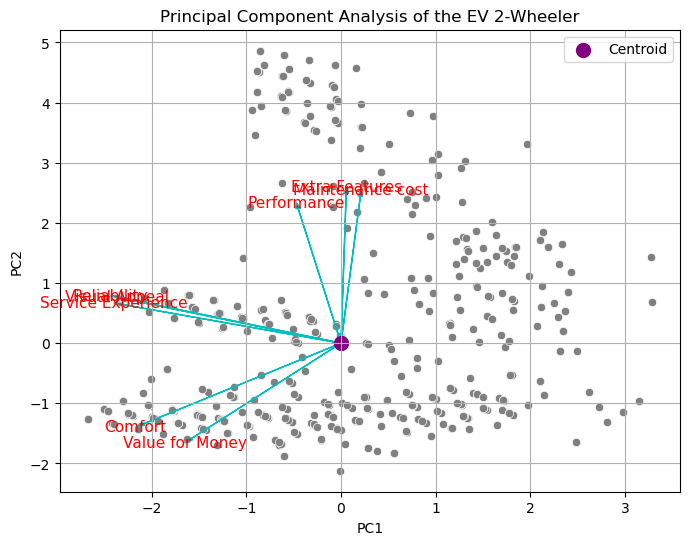

In [25]:
warnings.filterwarnings("ignore", message=".*__getitem__.*")

# Calculating centroid
centroid = np.mean(df_pca[['PC1', 'PC2']], axis=0)
index_names = factor_loadings.index

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', color='grey')

# Plotting arrows from centroid to provided coordinates with index names
for i in range(len(factor_loadings['PC1'])):
    plt.arrow(centroid[0], centroid[1], factor_loadings['PC1'].iloc[i] * 4.8, factor_loadings['PC2'].iloc[i] * 4.8, 
              head_width=0.05, head_length=0.1, fc='red', ec='c')
    plt.text(centroid[0] + factor_loadings['PC1'].iloc[i] * 5, centroid[1] + factor_loadings['PC2'].iloc[i] * 5, 
             index_names[i], fontsize=11, ha='center', color='r', va='center')

# Plotting centroid
plt.scatter(centroid[0], centroid[1], color='purple', marker='o', s=100, label='Centroid')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principal Component Analysis of the EV 2-Wheeler')
plt.grid(True)
plt.legend()
plt.savefig('ev_pca.png', format = 'png')
plt.show()

# Extracting Segments using KMeans

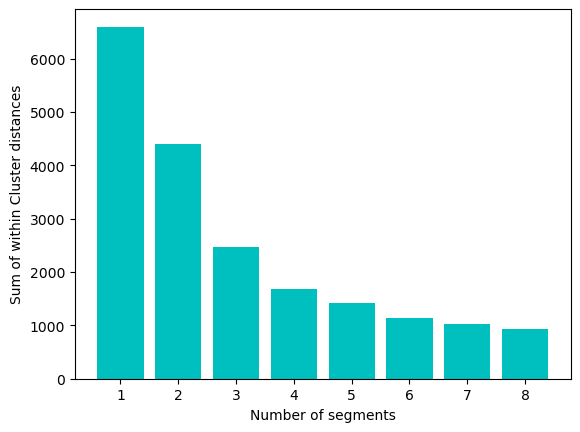

In [26]:
# Calculate distortions
distortions = []
for k in range(1, 9):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    kmeans.fit(data_scaled)
    distortions.append(kmeans.inertia_)

# Plot the scree plot
plt.bar(range(1, 9), distortions, color="c")
plt.xlabel('Number of segments')
plt.ylabel('Sum of within Cluster distances')
plt.show()

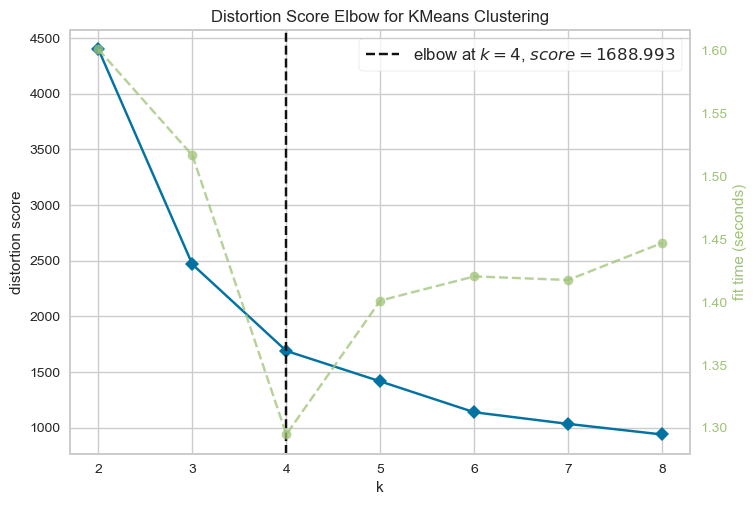

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
# Determining optimal number of clusters using Yellowbrick
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(kmeans, k=(2, 9))
visualizer.fit(df_pca)
visualizer.show()

In [28]:
# Fit KMeans clustering with optimal number of clusters
kmeans = KMeans(n_clusters=visualizer.elbow_value_, random_state=0, n_init=10)
kmeans.fit(data_scaled)

# Creating a DataFrame with the first two principal components
pf = pd.DataFrame(data_pca[:, :2], columns=['pc1', 'pc2'])

# Adding cluster labels to the DataFrame
pf['Cluster'] = kmeans.labels_

# Profiling Segments

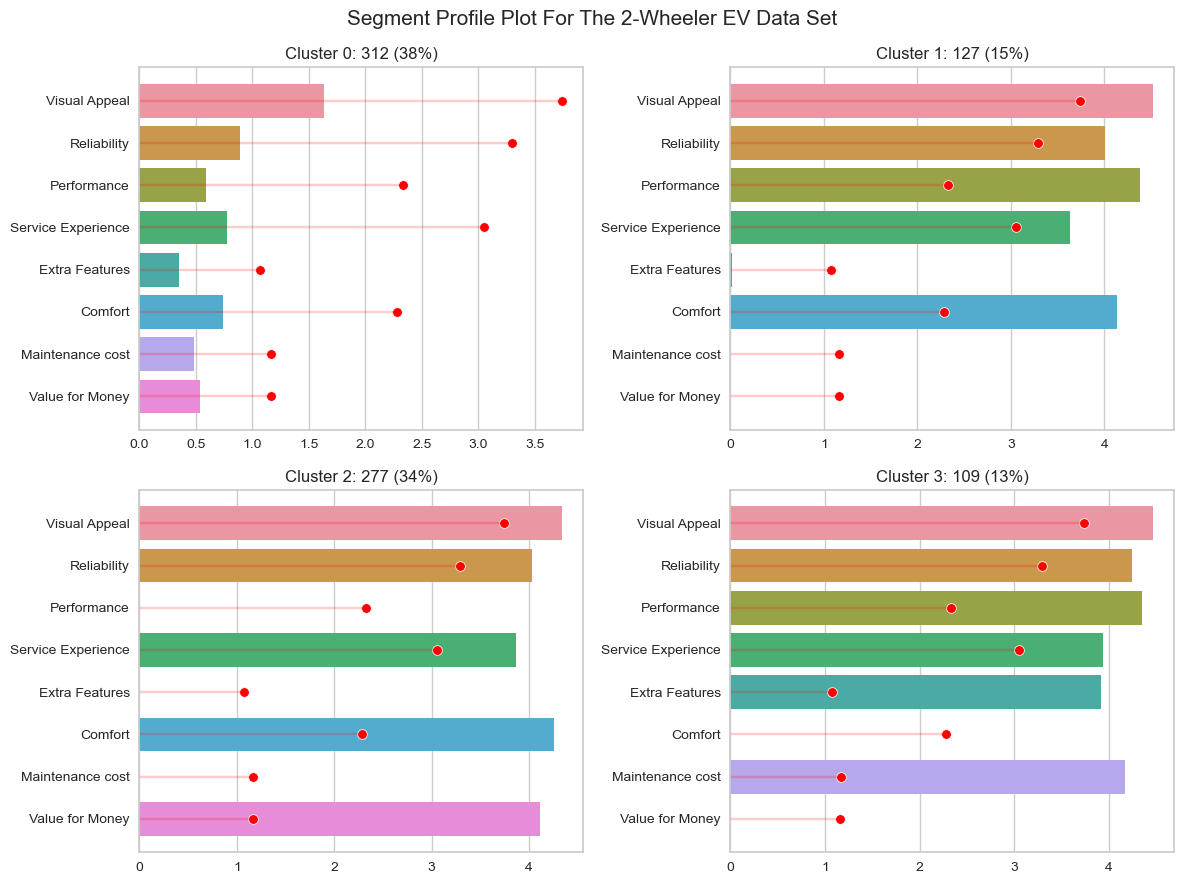

In [29]:
# Creating data profile
data_profile = data1.copy()
data_profile['cluster'] = kmeans.labels_

# Plotting segment profile
data_pivot = data_profile.groupby('cluster').mean().T
data_pivot_mean = data_pivot.mean(axis=1).reset_index()
data_pivot_mean.columns = ['Variable', 'Value']

plt.figure(figsize=(12, 9))
for i in range(visualizer.elbow_value_):
    plt.subplot(2, 2, i + 1)
    sns.barplot(data=data_pivot, x=i, y=data_pivot.index)
    sns.scatterplot(data=data_pivot_mean, x='Value', y='Variable', color='red')
    for index, row in data_pivot_mean.iterrows():
        plt.hlines(y=row['Variable'], xmin=0, xmax=row['Value'], colors='red', alpha=0.2)
    plt.ylabel("")
    plt.xlabel("")
    plt.title(f"Cluster {i}: {data_profile['cluster'].value_counts()[i]} ({data_profile['cluster'].value_counts()[i] * 100 / len(data_profile):.0f}%)")
plt.suptitle("Segment Profile Plot For The 2-Wheeler EV Data Set", fontsize=15)
plt.tight_layout()
plt.savefig('segment_profile.png', format = 'png')
plt.show()

**Above graph shows the different perceptions among different segments. Segment 0 (38% of consumers) expresses dissatisfaction across all aspects, marking them as the largest but least satisfied group. Segment 1 (representing 15% of consumers) values the electric two-wheeler vehicle for its visual appeal, reliability, comfort, service experience, and performance. Segment 2 (34% of consumers) appreciates visual appeal, reliability, service experience and comfort with Value for money as their main intentions. Lastly, Segment 3 (13% of consumers) values visual appeal, reliability, performance, service experience and notably, perceives a strong interest in Extra Features with Less Maintenance Cost.**

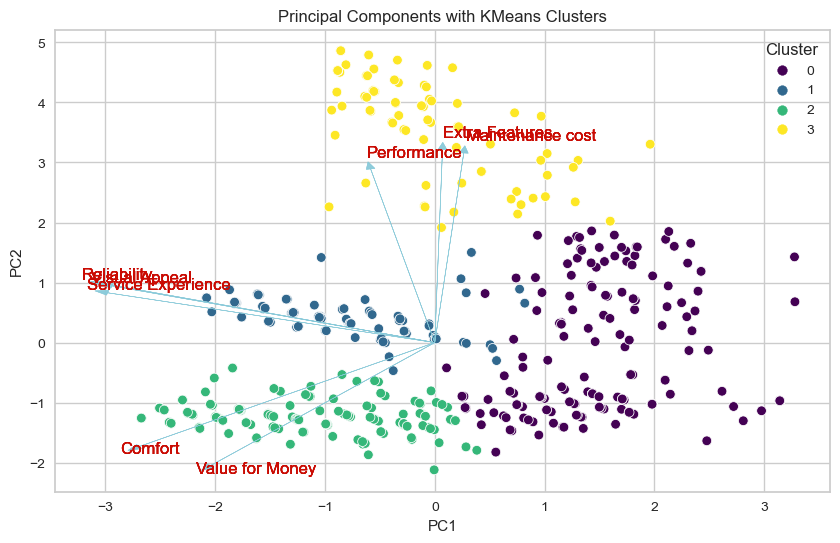

In [30]:
# Visualization of the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pf, x="pc1", y="pc2", hue="Cluster", palette='viridis', legend='full')

for cluster in range(len(kmeans.cluster_centers_)):
    for i, txt in enumerate(data1.columns):
        plt.arrow(0, 0, pca.components_.T[i, 0] * 6.2, pca.components_.T[i, 1] * 6.2,head_width=0.08, color='c', alpha=0.5)  
        plt.text(pca.components_.T[i, 0] * 6.6, pca.components_.T[i, 1] * 6.6, txt, color='r', fontsize=12)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principal Components with KMeans Clusters')
plt.savefig('clusters.png', format = 'png')
plt.show()

# Describing Segments

# i) Cross-Tabulation plot of Cluster & Sentiment

In [31]:
# Creating a Cross-Tab of cluster labels and Sentiments 
from statsmodels.graphics.mosaicplot import mosaic
sentiment_cluster = pd.crosstab(pf['Cluster'], data["sentiment"])
sentiment_cluster

sentiment,negative,neutral,positive
Cluster,,,
0,200,7,105
1,13,4,110
2,30,41,206
3,16,0,93


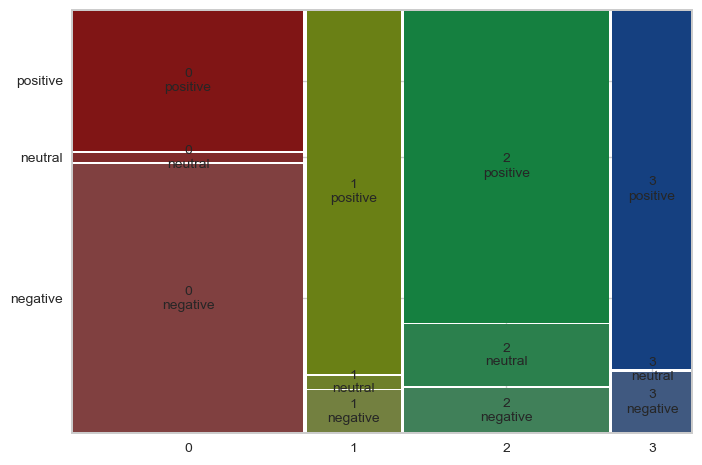

In [32]:
# Create the mosaic plot
mosaic(sentiment_cluster.stack())
plt.show()

**Above mosaic plot, explores consumer sentiments, revealing that all segments, except Segment 0, exhibit positive sentiments. Segment 0 consumers stand out with negative sentiments, indicating dissatisfaction across various aspects.**

# ii) Cross-Tabulation plot of Cluster & Usage

In [33]:
usage_cluster = pd.crosstab(index = pf['Cluster'], columns = data['Used it for'])
usage_cluster

Used it for,Daily Commute,Everything,Leisure Rides,Occasional Commute,Tours
Cluster,,,,,
0,234,43,7,25,3
1,75,39,4,9,0
2,194,55,7,19,2
3,86,19,2,1,1


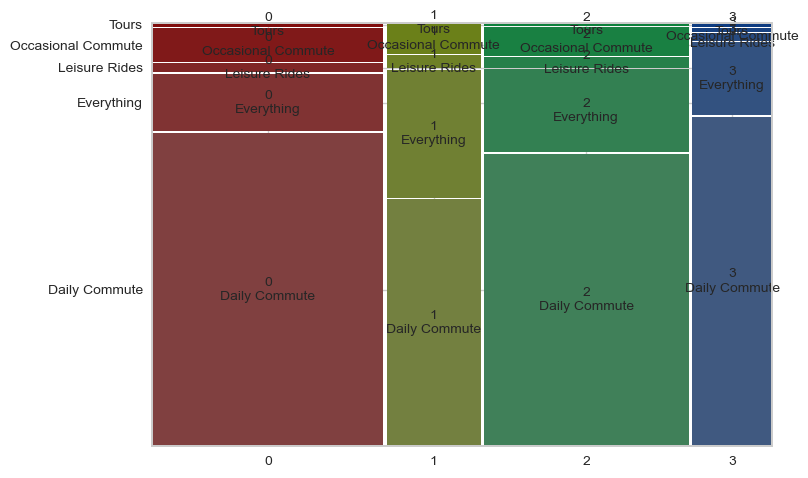

In [34]:
mosaic(usage_cluster.stack())
plt.show()

**Above mosaic plot illustrates that all segments predominantly use electric vehicles for daily commuting, with limited usage for tours, occasional commuting, and leisure rides.**


# iii) Cross-Tabulation plot of Cluster & Owned For

In [35]:
owned_cluster = pd.crosstab(index = pf['Cluster'], columns = data['Owned for'])
owned_cluster

Owned for,3-6 months,6 months-1 yr,< 3 months,> 1 yr,Never owned
Cluster,,,,,
0,39,56,67,115,35
1,16,14,31,10,56
2,41,51,79,56,50
3,14,13,43,20,19


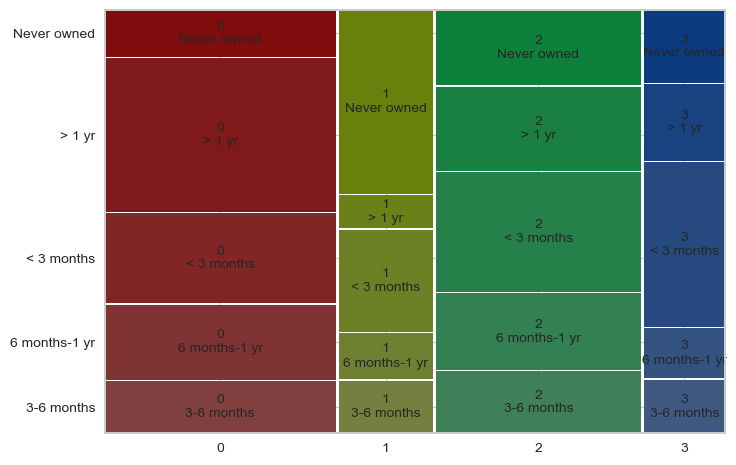

In [36]:
mosaic(owned_cluster.stack())
plt.show()

**Above mosaic plot shows the ownership duration of electric vehicles among segments.**

# iv) Cross-Tabulation plot of Cluster & Ridden For

In [37]:
ridden_cluster = pd.crosstab(index = pf['Cluster'], columns = data['Ridden for'])
ridden_cluster

Ridden for,10000-15000 kms,5000-10000 kms,< 5000 kms,> 15000 kms
Cluster,,,,
0,15,61,183,17
1,1,15,54,1
2,11,44,158,14
3,5,18,62,5


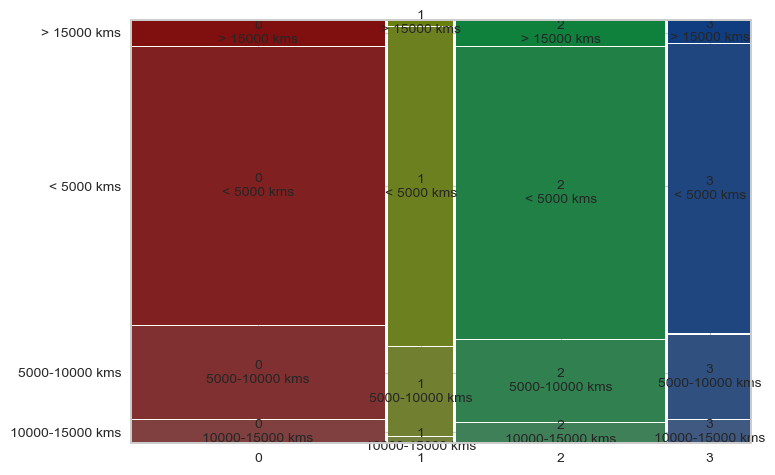

In [38]:
mosaic(ridden_cluster.stack())
plt.show()

**Above mosaic plot tells about the distances covered by consumers, indicating that all segments predominantly use electric vehicles for commuting, with most users covering distances below 5000 kms. A small portion falls in the 5000 to 10000 kms range, aligning with their commuting needs.**


# v) Boxplot between Cluster, Ratings & Price 

In [39]:
# Copying the original dataset and adding cluster labels
data_b = data.copy()
data_b["Cluster"] = kmeans.labels_
data_b

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,...,Value for Money,Model Name,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W),sentiment,Cluster
0,Revolt motors is a fraud company. They provide...,Daily Commute,> 1 yr,< 5000 kms,1,1.0,1.0,1.0,1.0,1.0,...,NaN,Revolt RV 400,134975,150,85,108,5,3000,negative,0
1,This is very good bike to ride comfortable als...,Daily Commute,3-6 months,< 5000 kms,4,4.0,3.0,3.0,4.0,NaN,...,NaN,Revolt RV 400,134975,150,85,108,5,3000,positive,1
2,Revolt bikes are the best budget friendly bike...,Daily Commute,< 3 months,< 5000 kms,4,5.0,3.0,4.0,3.0,NaN,...,NaN,Revolt RV 400,134975,150,85,108,5,3000,positive,1
3,It's a good and eco friendly bike. Very less m...,Daily Commute,6 months-1 yr,< 5000 kms,4,5.0,4.0,4.0,4.0,NaN,...,NaN,Revolt RV 400,134975,150,85,108,5,3000,positive,1
4,"Booked on 5th oct and got on Dhanteras, very n...",Everything,< 3 months,< 5000 kms,4,4.0,4.0,5.0,4.0,4.0,...,NaN,Revolt RV 400,134975,150,85,108,5,3000,positive,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,Awesome bike with awesome features but I need ...,Daily Commute,Never owned,NaN,5,5.0,5.0,5.0,5.0,5.0,...,NaN,Revolt RV 400,134975,150,85,108,5,3000,positive,3
821,Amazing buying experience. Revolt team is coop...,Everything,< 3 months,< 5000 kms,5,5.0,4.0,NaN,NaN,NaN,...,5.0,Revolt RV 400,134975,150,85,108,5,3000,positive,2
822,Nice bike electric\nGood in looks\nEasy to cha...,Daily Commute,> 1 yr,> 15000 kms,5,5.0,5.0,5.0,5.0,5.0,...,NaN,Revolt RV 400,134975,150,85,108,5,3000,positive,3
823,Very bad experience even before I start using ...,Daily Commute,< 3 months,< 5000 kms,2,NaN,NaN,NaN,NaN,NaN,...,NaN,Revolt RV 400,134975,150,85,108,5,3000,positive,0


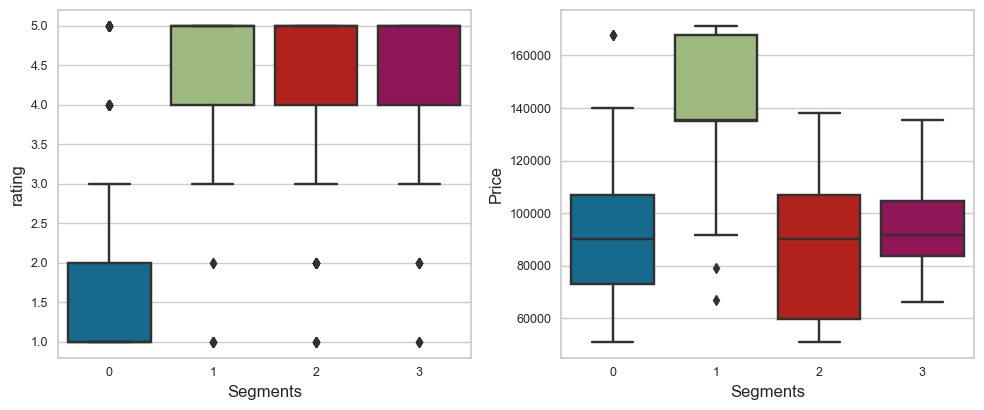

In [40]:
plt.figure(figsize=(10, 12))
for i, col in enumerate(["rating", "Price"]):
    plt.subplot(3, 2, i+1)
    sns.boxplot(data=data_b, x='Cluster', y=col)
    plt.xlabel("Segments", fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.xticks(fontsize=9)
    plt.yticks(fontsize=9)
plt.tight_layout()
plt.savefig('boxplot.png', format = 'png')
plt.show()

**Above Fig. Shows that in the Ratings Plot, Segment 0 Consumers gave the least ratings while other Segment consumers like their choices. According to the Segment & Price Plot, Segment 1 consumers prefers high-price vehicles compared to others. Conversely, Segment 2 constitute the consumers who prefer to have the more economic friendly vehicle.**  

# Selecting the Target Segment

# i) Overall Ratings Cluster-wise

In [41]:
ratings_frequency = data_b.groupby('Cluster')['rating'].mean()   # Grouping by clusters and taking their average
ratings_frequency = ratings_frequency.to_frame().reset_index()    # Converting the obtained value to a dataframe 
ratings_frequency

,Cluster,rating
0,0,1.817308
1,1,4.377953
2,2,4.285199
3,3,4.293578


# ii) Average Pricing Cluster-wise

In [42]:
pricing = data_b.groupby('Cluster')['Price'].mean()   
pricing = pricing.to_frame().reset_index()    
pricing

,Cluster,Price
0,0,92909.448718
1,1,140755.259843
2,2,85617.815884
3,3,96430.981651


# iii) Overall Sentiment Cluster-wise

In [43]:
# Convert sentiment labels to numerical values
sentiment_values = {'positive': 1, 'neutral': 0, 'negative': -1}
data_b['sentiment_value'] = data_b['sentiment'].map(sentiment_values)

# Calculate the average sentiment for each cluster
average_sentiment = data_b.groupby('Cluster')['sentiment_value'].mean().reset_index()

# Rename the columns for clarity
average_sentiment.columns = ['Cluster', 'Average Sentiment']

# Convert the average sentiment score to sentiment labels
average_sentiment['Overall Sentiment'] = average_sentiment['Average Sentiment'].apply(lambda x: 'Positive' if x > 0 
                                                                                      else 'Negative' if x < 0 else 'Neutral')
average_sentiment

,Cluster,Average Sentiment,Overall Sentiment
0,0,-0.304487,Negative
1,1,0.763780,Positive
2,2,0.635379,Positive
3,3,0.706422,Positive


- **Combined Data**

In [44]:
combined = ratings_frequency.merge(pricing, on="Cluster", how="left").merge(average_sentiment, on="Cluster", how="left")
combined

,Cluster,rating,Price,Average Sentiment,Overall Sentiment
0,0,1.817308,92909.448718,-0.304487,Negative
1,1,4.377953,140755.259843,0.763780,Positive
2,2,4.285199,85617.815884,0.635379,Positive
3,3,4.293578,96430.981651,0.706422,Positive


# Target Segment

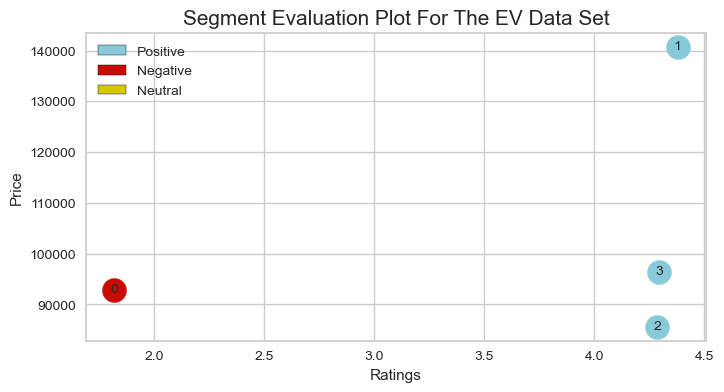

In [45]:
# Defining colors based on overall sentiment
colors = {'Positive': 'c', 'Negative': 'r', 'Neutral': 'y'}

# Visualizing segment evaluation plot with sentiment coloring
plt.figure(figsize=(8, 4))
for i in range(len(combined)):
    plt.scatter(combined["rating"][i], combined["Price"][i], s=300, color=colors[combined['Overall Sentiment'][i]])
    plt.text(combined["rating"][i], combined["Price"][i], combined.index[i], ha='center', va='center', fontsize=10)

from matplotlib.patches import Patch

legend_elements = [Patch(facecolor='c', edgecolor='black', label='Positive'),
                   Patch(facecolor='r', edgecolor='black', label='Negative'),
                   Patch(facecolor='y', edgecolor='black', label='Neutral')]
plt.legend(handles=legend_elements, loc='upper left')

plt.title("Segment Evaluation Plot For The EV Data Set", fontsize=15)
plt.xlabel("Ratings")
plt.ylabel("Price")
plt.savefig('Segment_evaluation_with_sentiment_and_legend.png', format='png')
plt.show()

**Based on the analysis, two key segments emerge as the primary targets for the EV market: Segment 0, comprising 38% of consumers, and Segment 2, representing 34% of the market.
Segment 0 exhibits diverse preferences and dissatisfaction points, indicating an opportunity to enhance customer satisfaction and loyalty by addressing their specific needs directly.
Meanwhile, Segment 2 prioritizes visual appeal, reliability, service experience, and comfort, with a focus on value for money. This segment presents an opportunity to tailor EV offerings to meet these expectations, emphasizing low maintenance costs.
The proposed strategy involves addressing dissatisfaction points in Segment 1 while leveraging the positive elements in Segment 2.**

# Customizing the Marketing Mix

**Target Segments:**
- **Segment 0:** Represents 38% of consumers. Diverse preferences and dissatisfaction points.
- **Segment 2:** Represents 34% of consumers. Values visual appeal, reliability, service experience and comfort with value for money.

**1. Product Customization:**
   - **Segment 0:** Enhance features based on specific desires, addressing dissatisfaction points.
   - **Segment 2:** Emphasize visual appeal, reliability, and value for money.

**2. Price Customization:**
   - **Segment 0:** Offer competitive pricing.
   - **Segment 2:** Slightly higher price point for value-added features.

**3. Promotion Customization:**
   - **Segment 0:** Targeted advertising addressing diverse preferences and dissatisfaction points.
   - **Segment 2:** Tailored promotional events highlighting visual appeal and value for money.

**4. Place Customization:**
   - **Segment 0:** Establish accessible distribution channels in urban areas.
   - **Segment 2:** Focus on suburban/semi-urban regions with a strong online presence.

# Potential Early Market Customer Base
**In the analysis of the early market customer base, two primary segments are identified:**
- **Segment 0 with 312 members (38% of Consumers) and Segment 2 with 277 members (34% of Consumers).** 
- The **Target Price Range for Segment 0 falls between ₹77,000 and ₹1,08,000, and for Segment 2, it ranges from ₹60,000 to ₹1,08,000**. By multiplying the number of potential customers in each segment by the targeted price range, potential profits can be calculated. 

For Example, with a target price of ₹1,00,000 for Segment 0, the potential profit amounts to ₹3.12 crores, and for Segment 2 with a target price of ₹90,000, the potential profit is ₹2.49 crores. Segment 0 & Segment 2, being larger in potential market share, is the primary focus for early market penetration efforts due to its significant profit opportunity.

# Most Optimal Market Segments
After thorough analysis and evaluation, **Segment 0, constituting 38% of consumers and Segment 2, consisting of 34% of the consumers** has been identified as the optimal market segments for electric 2-wheeler vehicles. With a significant customer base and affordable price range, this segment offers substantial market potential. The Upper limit of the Price range for both the segments is same; thus, it's possible to **divert the vast majority of unsatisfied consumers from the Segment 0** by fullfilling their specific requirements. Hence, leveraging the consumers from both segments is achievable. 